In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
# import SMOTE oversampling and other necessary libraries
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import chi2
import sklearn.base

In [2]:
df= pd.read_excel('/content/Fresco_LargeRetailer.xlsx')
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,8,True,1985-12-31,M,0,4,3
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,2,True,1985-12-31,M,1,3,2
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,...,1.0,14356,104013.0,5,True,1985-12-31,M,1,1,2
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,...,4.0,12776,92580.0,8,True,1985-12-31,M,1,5,3
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,...,1.0,1101,101763.0,3,True,1985-12-31,M,0,1,3


In [3]:
month_map = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
prod_cat_map = {1: "Bags", 2: "Books", 3: "Clothing", 4: "Electronics", 5: "Footwear", 6: "Home and kitchen"}
prod_subcat_map = {1: 'Bath', 2: 'Academic', 3: 'Women', 4: 'Mens', 5: 'Tools', 6: 'Fiction', 7: 'DIY', 8: 'Kitchen', 9: 'Non-Fiction', 10: 'Kids', 11: 'Mobiles', 12: 'Audio and video', 13: 'Comics', 14: 'Computers', 15: 'Furnishing', 16: 'Children', 17: 'Personal Appliances', 18: 'Cameras'}
education_map = {1: 'Basic', 2: 'Graduation', 3: 'Master', 4: 'PhD', 5: 'Others'}
profession_map = {1: 'Self Employed', 2: 'Salaried', 3: 'Others'}
city_map = {1: 'Mumbai', 2: 'Bangalore', 3: 'New Delhi', 4: 'Gurgaon', 5: 'Kolkata', 6: 'Chennai', 7: 'Pune', 8: 'Hyderabad', 9: 'Vishakhapatnam', 10: 'Ahmedabad'}
return_map = {True: 'Yes', False: 'No'}

df['Month_code'] = df['Month_code'].map(month_map)
df['prod_cat_code'] = df['prod_cat_code'].map(prod_cat_map)
df['prod_subcat_code'] = df['prod_subcat_code'].map(prod_subcat_map)
df['Education_code'] = df['Education_code'].map(education_map)
df['Profession_Code'] = df['Profession_Code'].map(profession_map)
df['city_code'] = df['city_code'].map(city_map)
df['Return'] = df['Return'].map(return_map)


In [4]:
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,Hyderabad,Yes,1985-12-31,M,0,PhD,Others
1,49441287,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,Bangalore,Yes,1985-12-31,M,1,Master,Salaried
2,426787191,January,Home and kitchen,Bath,4,1327,6635,696.675,NaN,Debit Card,...,1.0,14356,104013.0,Kolkata,Yes,1985-12-31,M,1,Basic,Salaried
3,525041466,January,Footwear,Mens,5,1325,6625,695.625,NaN,Debit Card,...,4.0,12776,92580.0,Hyderabad,Yes,1985-12-31,M,1,Others,Others
4,1167308476,January,Clothing,Women,3,1237,6185,649.425,NaN,Debit Card,...,1.0,1101,101763.0,New Delhi,Yes,1985-12-31,M,0,Basic,Others


In [5]:
#filling NaN with zero, it means no delivery charge
df['Delivery_chrgs']= df['Delivery_chrgs'].fillna(0)

In [6]:
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,Hyderabad,Yes,1985-12-31,M,0,PhD,Others
1,49441287,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,Bangalore,Yes,1985-12-31,M,1,Master,Salaried
2,426787191,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,...,1.0,14356,104013.0,Kolkata,Yes,1985-12-31,M,1,Basic,Salaried
3,525041466,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,...,4.0,12776,92580.0,Hyderabad,Yes,1985-12-31,M,1,Others,Others
4,1167308476,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,...,1.0,1101,101763.0,New Delhi,Yes,1985-12-31,M,0,Basic,Others


In [7]:
df.describe()

,transaction_id,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,CustID,Income,DOB,Marital_status
count,1.959700e+04,19597.000000,19597.000000,19597.00000,19597.000000,19597.000000,19546.000000,19597.000000,19554.000000,19597,19597.00000
mean,5.304610e+10,3.098178,777.154718,2302.11563,241.722141,65.102312,3.882329,9799.000000,70539.063977,1974-12-16 09:56:00.085727424,0.52901
min,4.145331e+07,1.000000,70.000000,70.00000,7.350000,0.000000,1.000000,1.000000,7157.000000,1964-01-02 00:00:00,0.00000
25%,2.943273e+10,2.000000,418.000000,915.00000,96.075000,0.000000,3.000000,4900.000000,37962.000000,1969-07-26 00:00:00,0.00000
50%,5.332340e+10,3.000000,775.000000,1826.00000,191.730000,50.000000,4.000000,9799.000000,69316.000000,1974-11-28 00:00:00,1.00000
75%,7.684265e+10,4.000000,1136.000000,3348.00000,351.540000,90.000000,5.000000,14698.000000,99548.000000,1980-05-05 00:00:00,1.00000
max,9.998755e+10,5.000000,1500.000000,7500.00000,787.500000,250.000000,5.000000,19597.000000,159984.000000,1985-12-31 00:00:00,1.00000
std,2.724848e+10,1.445638,414.308709,1742.62635,182.975767,81.027200,1.414998,5657.310948,37428.491760,NaN,0.49917


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19597 entries, 0 to 19596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19597 non-null  int64         
 1   Month_code        19597 non-null  object        
 2   prod_cat_code     19597 non-null  object        
 3   prod_subcat_code  19597 non-null  object        
 4   Qty               19597 non-null  int64         
 5   Rate              19597 non-null  int64         
 6   Amount            19597 non-null  int64         
 7   Tax               19597 non-null  float64       
 8   Delivery_chrgs    19597 non-null  float64       
 9   Payment_mode      19597 non-null  object        
 10  Store_type        19597 non-null  object        
 11  Reviews           19546 non-null  float64       
 12  CustID            19597 non-null  int64         
 13  Income            19554 non-null  float64       
 14  city_code         1959

In [9]:
df.drop(['CustID','transaction_id','DOB'],inplace=True, axis=1)

In [10]:
df.isnull().sum()

Month_code           0
prod_cat_code        0
prod_subcat_code     0
Qty                  0
Rate                 0
Amount               0
Tax                  0
Delivery_chrgs       0
Payment_mode         0
Store_type           0
Reviews             51
Income              43
city_code            0
Return               0
Gender               0
Marital_status       0
Education_code       0
Profession_Code      0
dtype: int64

In [11]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Month_code          0.000000
prod_cat_code       0.000000
prod_subcat_code    0.000000
Qty                 0.000000
Rate                0.000000
Amount              0.000000
Tax                 0.000000
Delivery_chrgs      0.000000
Payment_mode        0.000000
Store_type          0.000000
Reviews             0.260244
Income              0.219421
city_code           0.000000
Return              0.000000
Gender              0.000000
Marital_status      0.000000
Education_code      0.000000
Profession_Code     0.000000
dtype: float64


In [12]:
df.dropna(inplace= True)

<ipython-input-14-5f3a53c51831>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Return', kind='count', data=df,palette='Set2')


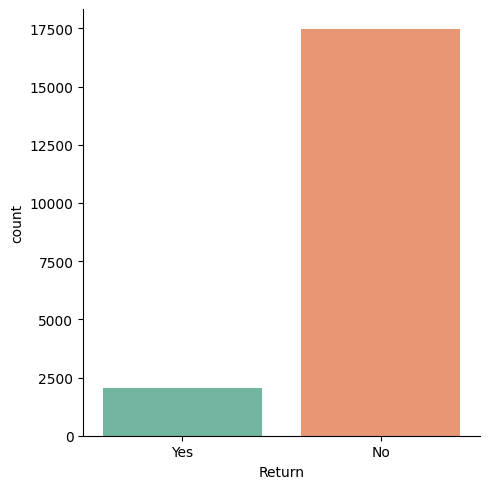

In [14]:
#Univariate Analysis
sns.catplot(x='Return', kind='count', data=df,palette='Set2')

<ipython-input-15-a95f7396b93e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.catplot(x='prod_cat_code', kind='count', data=df,palette='Set1')


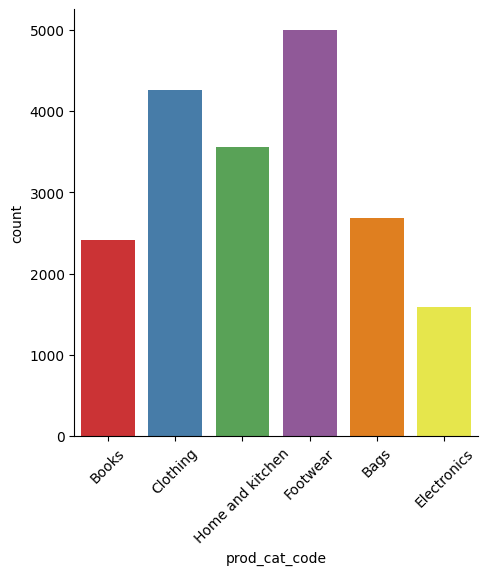

In [15]:
plot=sns.catplot(x='prod_cat_code', kind='count', data=df,palette='Set1')
plot.set_xticklabels(rotation=45)

<ipython-input-16-ecb5692006f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x='prod_subcat_code', kind='count', data=df, height=6, aspect=2,palette='Set2')


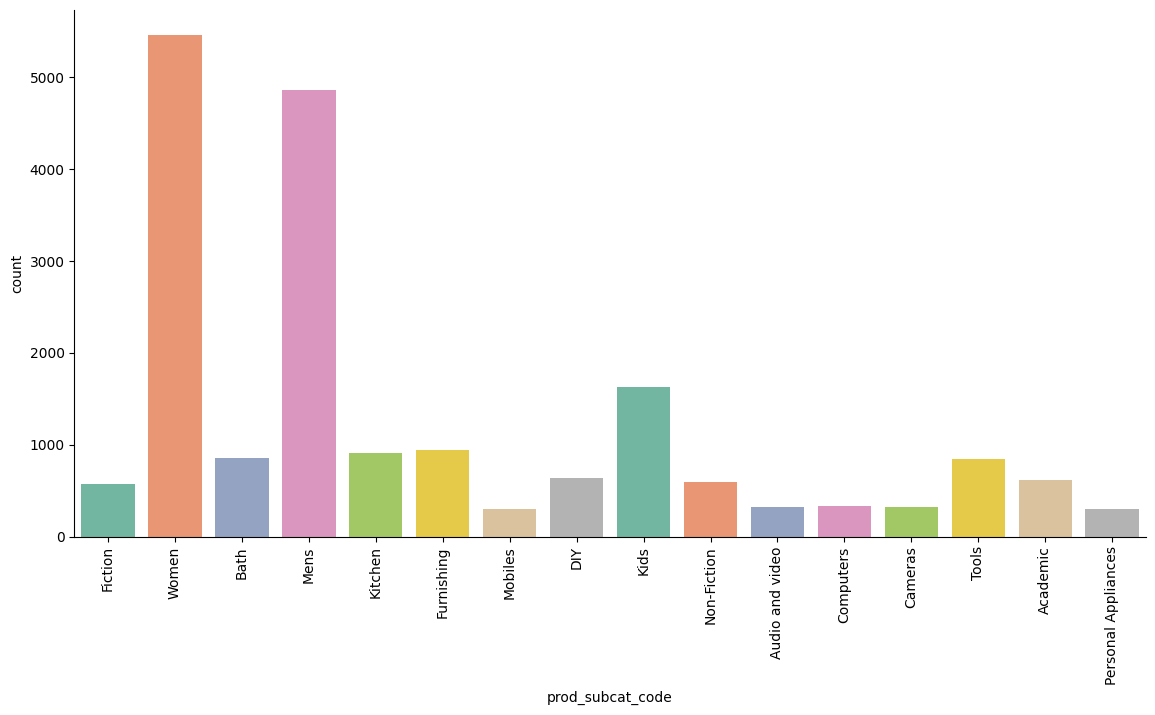

In [16]:
plot = sns.catplot(x='prod_subcat_code', kind='count', data=df, height=6, aspect=2,palette='Set2')
plot.set_xticklabels(rotation=90)

<ipython-input-17-e1c98977afde>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.catplot(x='Qty', kind='count', data=df,palette='Set2')


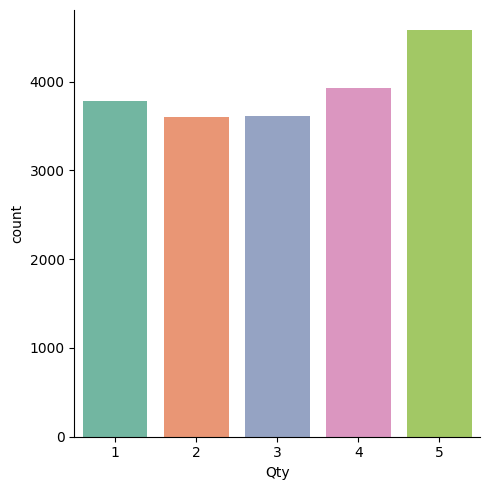

In [17]:
plot=sns.catplot(x='Qty', kind='count', data=df,palette='Set2')

<Axes: ylabel='Frequency'>

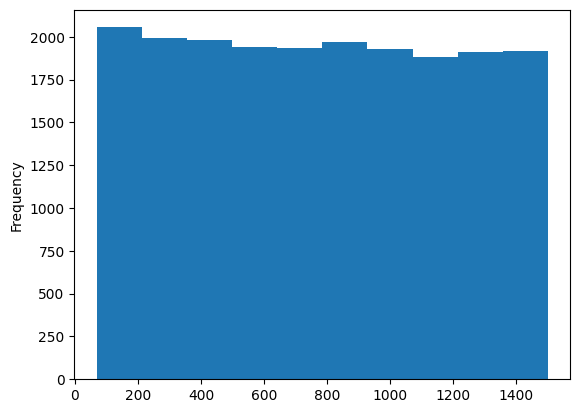

In [19]:
df["Rate"].plot(kind="hist")

<Axes: xlabel='Rate', ylabel='Count'>

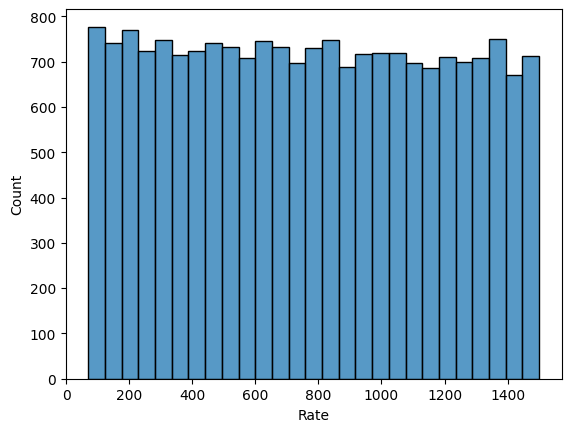

In [25]:
sns.histplot(df,x="Rate")

<Axes: xlabel='Tax', ylabel='Count'>

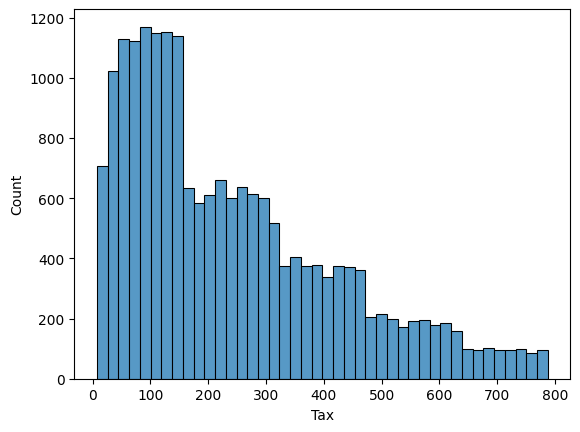

In [26]:
sns.histplot(df,x="Tax")

<Axes: ylabel='Frequency'>

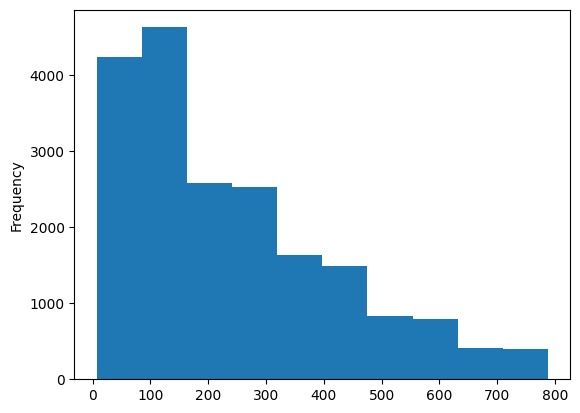

In [27]:
df["Tax"].plot(kind="hist")

<ipython-input-20-d3ddf1fe57a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.catplot(x='Payment_mode', kind='count', data=df,palette='Set2')


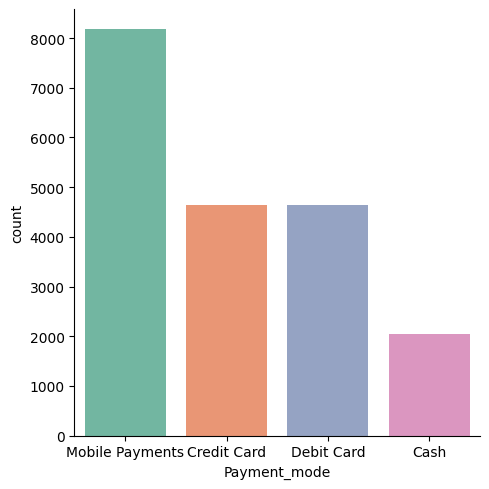

In [20]:
plot=sns.catplot(x='Payment_mode', kind='count', data=df,palette='Set2')

<ipython-input-21-131005898b93>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Store_type',kind='count',data=df,palette='Set2')


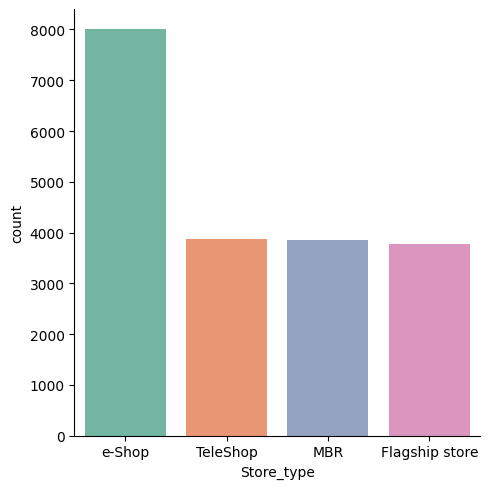

In [21]:
sns.catplot(x='Store_type',kind='count',data=df,palette='Set2')

<ipython-input-22-7a29685492f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Reviews',kind='count',data=df,palette='Set2')


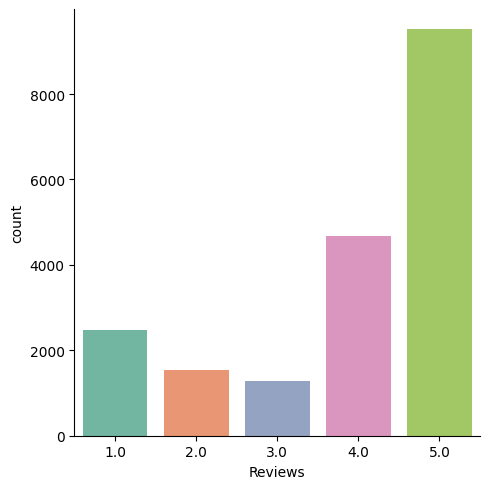

In [22]:
sns.catplot(x='Reviews',kind='count',data=df,palette='Set2')

<Axes: xlabel='Month_code', ylabel='count'>

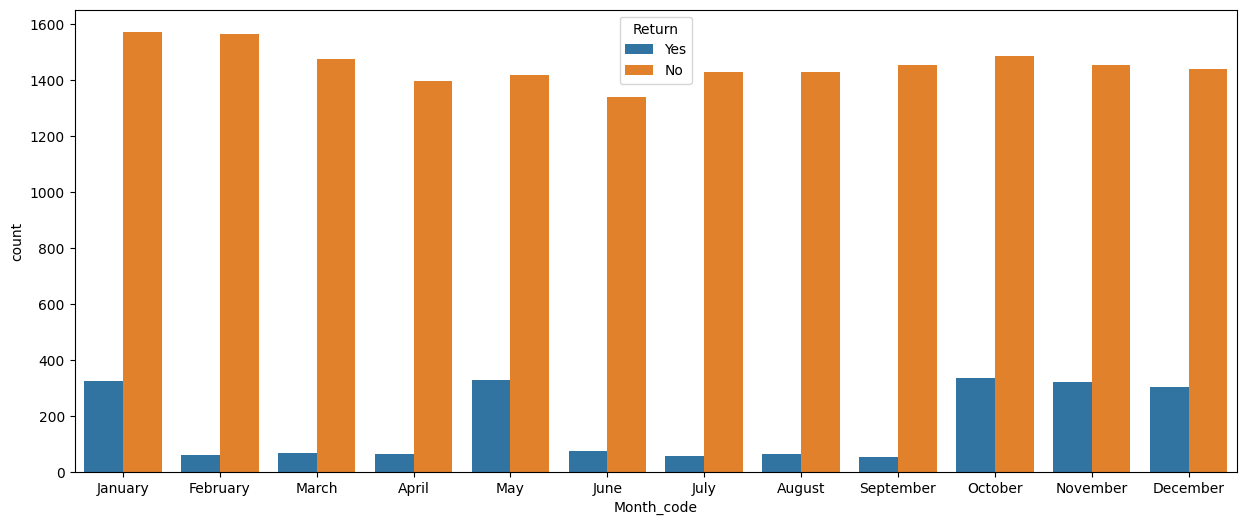

In [23]:
#Bivariate Analysis
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='Month_code', hue='Return', data=df, ax=ax)

<Axes: xlabel='Reviews', ylabel='count'>

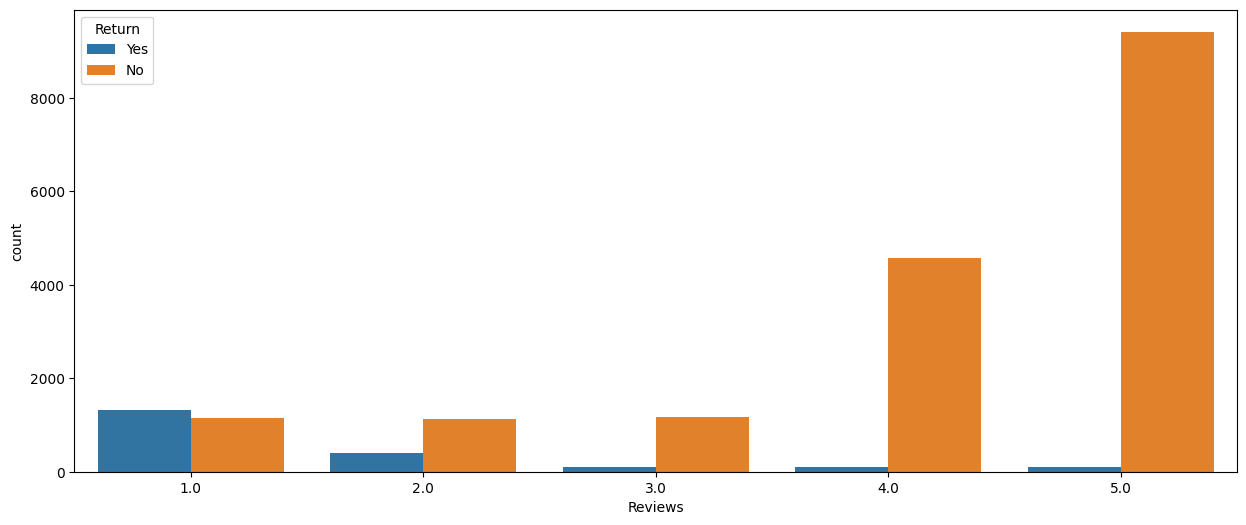

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='Reviews', hue='Return', data=df, ax=ax)

<Axes: xlabel='Rate', ylabel='Return'>

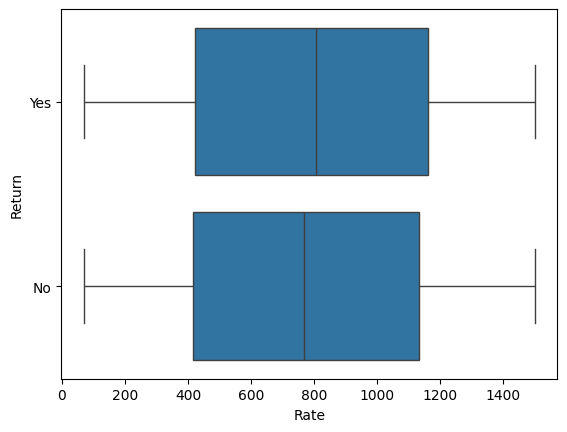

In [25]:
sns.boxplot(x='Rate',y='Return',data=df)

<Axes: xlabel='Amount', ylabel='Return'>

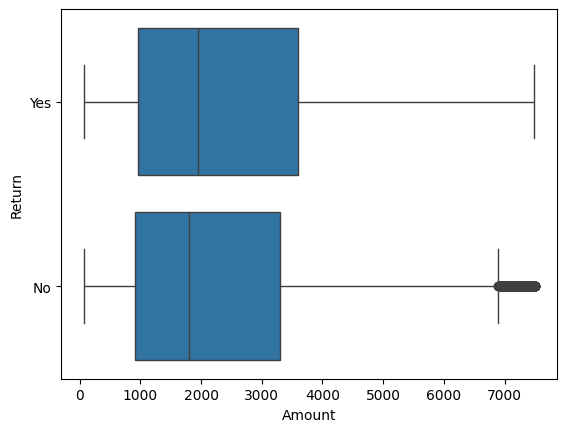

In [26]:
sns.boxplot(x='Amount',y='Return',data=df)

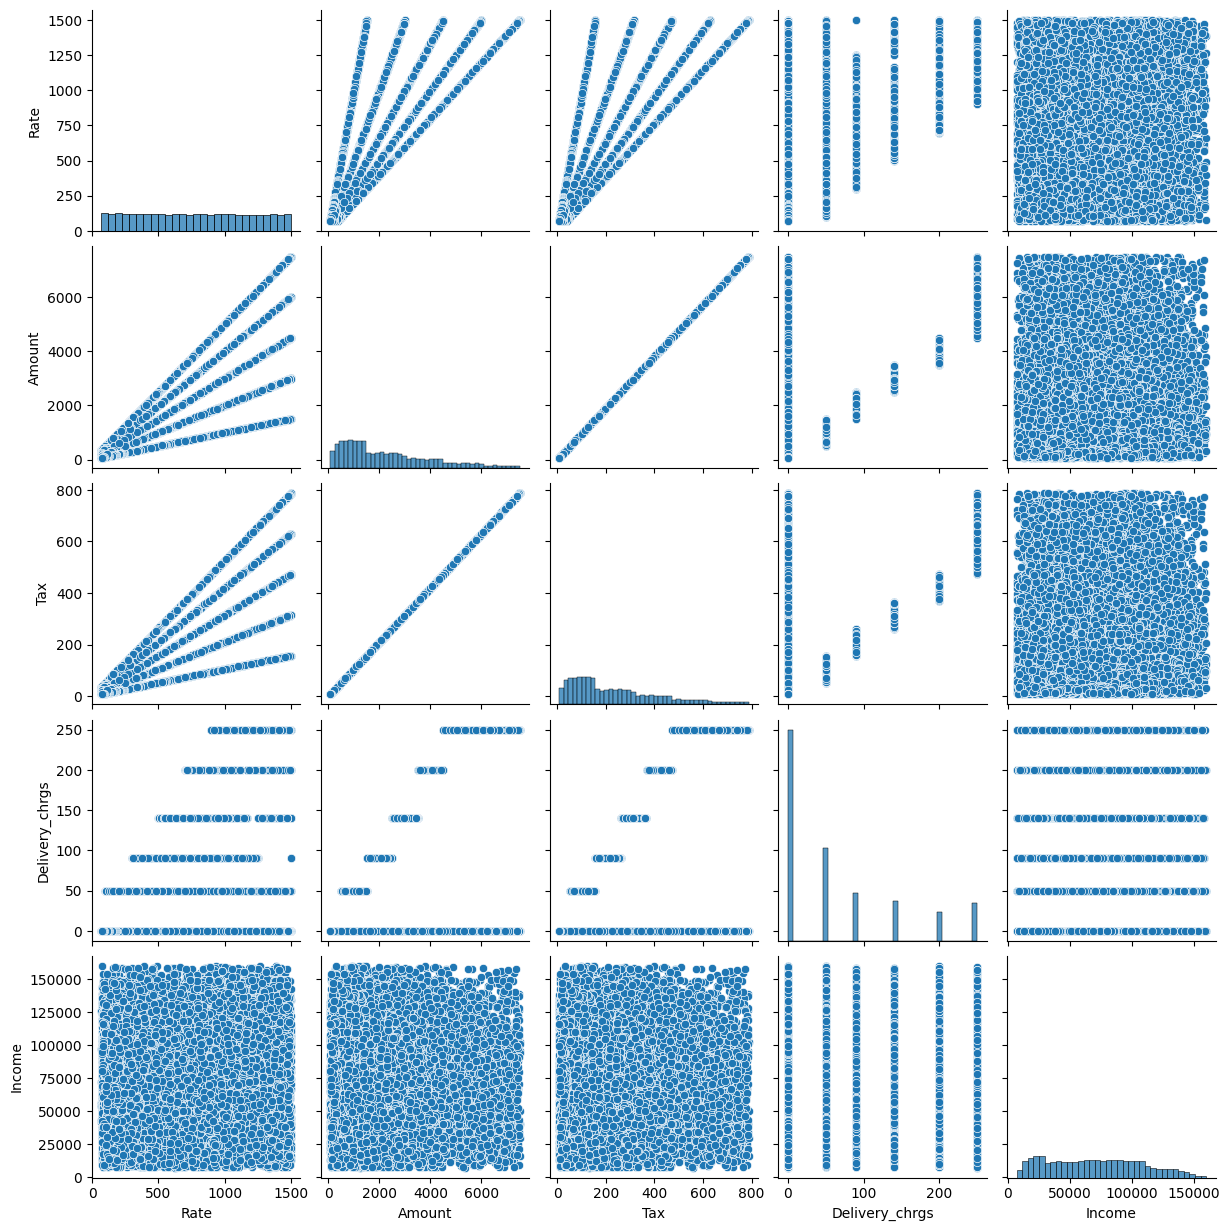

In [27]:
sns.pairplot(df[['Rate','Amount','Tax','Delivery_chrgs','Income']])

In [28]:
df['Qty']=df['Qty'].astype('str')
df['Marital_status']= df['Marital_status'].astype('str')
df['Reviews']= df['Reviews'].astype('str')

In [29]:
Months = pd.get_dummies(df['Month_code'],drop_first=True)
product_cat= pd.get_dummies(df['prod_cat_code'],drop_first=True)
product_subcat= pd.get_dummies(df['prod_subcat_code'],drop_first=True)
qty= pd.get_dummies(df['Qty'],drop_first=True)
payment_mode= pd.get_dummies(df['Payment_mode'],drop_first=True)
store_type= pd.get_dummies(df['Store_type'],drop_first=True)
City_code=  pd.get_dummies(df['city_code'],drop_first=True)
gender=  pd.get_dummies(df['Gender'],drop_first=True)
df['Education_code'].replace({'Others':0,'Basic':1 ,'Graduation':2, 'Master':3,'PhD':4}, inplace=True)
Profession= pd.get_dummies(df['Profession_Code'],drop_first=True)
reviews= pd.get_dummies(df['Reviews'],drop_first=True)

In [30]:
df= pd.concat([df,Profession,gender,City_code,store_type,payment_mode,product_subcat,qty,Months,product_cat,reviews],axis=1)
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,...,September,Books,Clothing,Electronics,Footwear,Home and kitchen,2.0,3.0,4.0,5.0
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,...,False,True,False,False,False,False,False,False,False,False
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,...,False,False,True,False,False,False,False,False,False,False
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,...,False,False,False,False,False,True,False,False,False,False
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,...,False,False,False,False,True,False,False,False,True,False
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,...,False,False,True,False,False,False,False,False,False,False


In [31]:
df.drop(['Month_code','prod_cat_code','prod_subcat_code','Qty','Payment_mode','Store_type','city_code','Gender',
        'Education_code','Profession_Code', 'Reviews'],axis=1,inplace=True)

In [32]:
df.head()

,Rate,Amount,Tax,Delivery_chrgs,Income,Return,Marital_status,Salaried,Self Employed,M,...,September,Books,Clothing,Electronics,Footwear,Home and kitchen,2.0,3.0,4.0,5.0
0,359,1795,188.475,90.0,67501.0,Yes,0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,1129,5645,592.725,250.0,102738.0,Yes,1,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,1327,6635,696.675,0.0,104013.0,Yes,1,True,False,True,...,False,False,False,False,False,True,False,False,False,False
3,1325,6625,695.625,0.0,92580.0,Yes,1,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,1237,6185,649.425,0.0,101763.0,Yes,0,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [33]:
corr = df[['Rate', 'Amount', 'Tax', 'Delivery_chrgs', 'Income']].corr()


<Axes: >

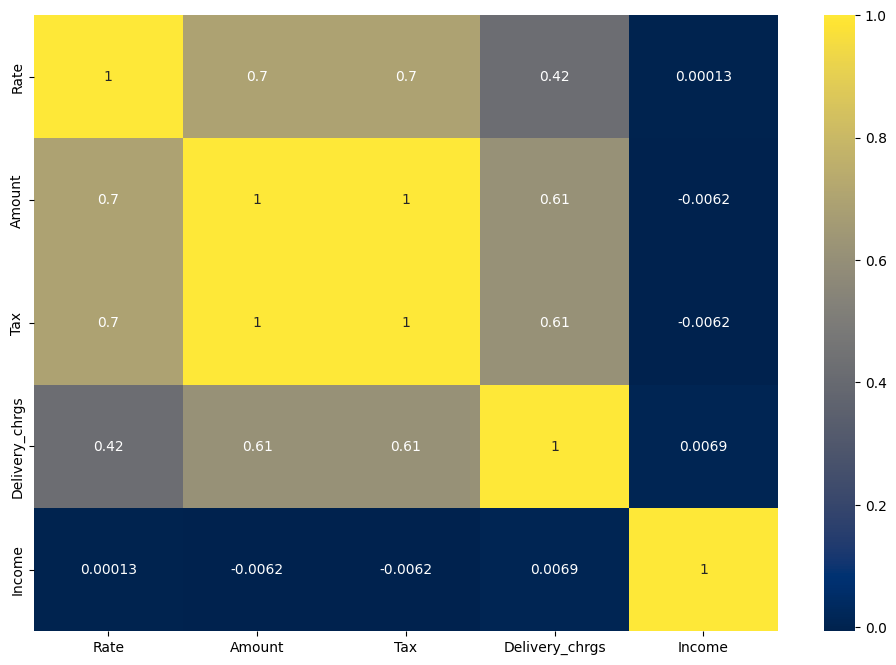

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="cividis")


In [35]:
cont_col=df[['Rate','Amount','Tax','Delivery_chrgs','Income']]

In [36]:
threshold=0.90
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(cont_col,threshold)

{'Tax'}

In [37]:
df.drop('Tax',inplace=True,axis=1)

In [38]:
X= df.drop('Return', axis=1)
y= df['Return']

In [39]:
y= y.replace({'Yes':1,'No':0})

In [40]:
#chi squared test
chi_catcols= X[['Marital_status',
       'Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Fiction', 'Furnishing', 'Kids', 'Kitchen', 'Mens', 'Mobiles',
       'Non-Fiction', 'Personal Appliances', 'Tools', 'Women', '2', '3', '4',
       '5', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Books', 'Clothing',
       'Electronics', 'Footwear', 'Home and kitchen', '2.0', '3.0', '4.0',
       '5.0']]

In [41]:
chi_scores = chi2(chi_catcols,y)

In [42]:
chi_scores

(array([2.11213507e-01, 2.22746001e-01, 5.28335092e-01, 4.98231006e-03,
        2.40903092e+00, 6.01279795e-02, 2.26469989e+00, 1.17802205e+00,
        5.71560542e-01, 6.70888979e-01, 2.34011589e+00, 3.83912789e-02,
        1.05520300e+00, 1.70381595e+00, 1.33927770e+00, 2.22642377e-01,
        8.61386973e-01, 1.77347206e+00, 2.54329395e+00, 2.24403457e+01,
        5.88165980e+00, 1.89325055e+01, 2.07026964e-01, 5.86842043e-01,
        2.27443166e+01, 3.60239380e+01, 4.78553946e+01, 2.91170289e+01,
        1.27210760e+02, 4.31011890e+00, 2.24802071e+01, 2.03783370e+00,
        8.60343559e+00, 3.57082576e+02, 2.18932843e+02, 2.24761670e+02,
        8.90389382e+01, 9.59987260e+02, 6.10691365e+01, 8.91066974e+01,
        7.87195872e+01, 8.87609086e+01, 7.15801803e+01, 4.36787607e+01,
        6.45415537e+01, 1.25009435e+02, 1.08831102e+02, 1.22462848e+02,
        7.79150745e+01, 5.40249707e+01, 5.54852890e-01, 1.62979890e+01,
        8.76386479e+00, 1.02268259e+01, 4.28345262e+02, 9.754874

<Axes: >

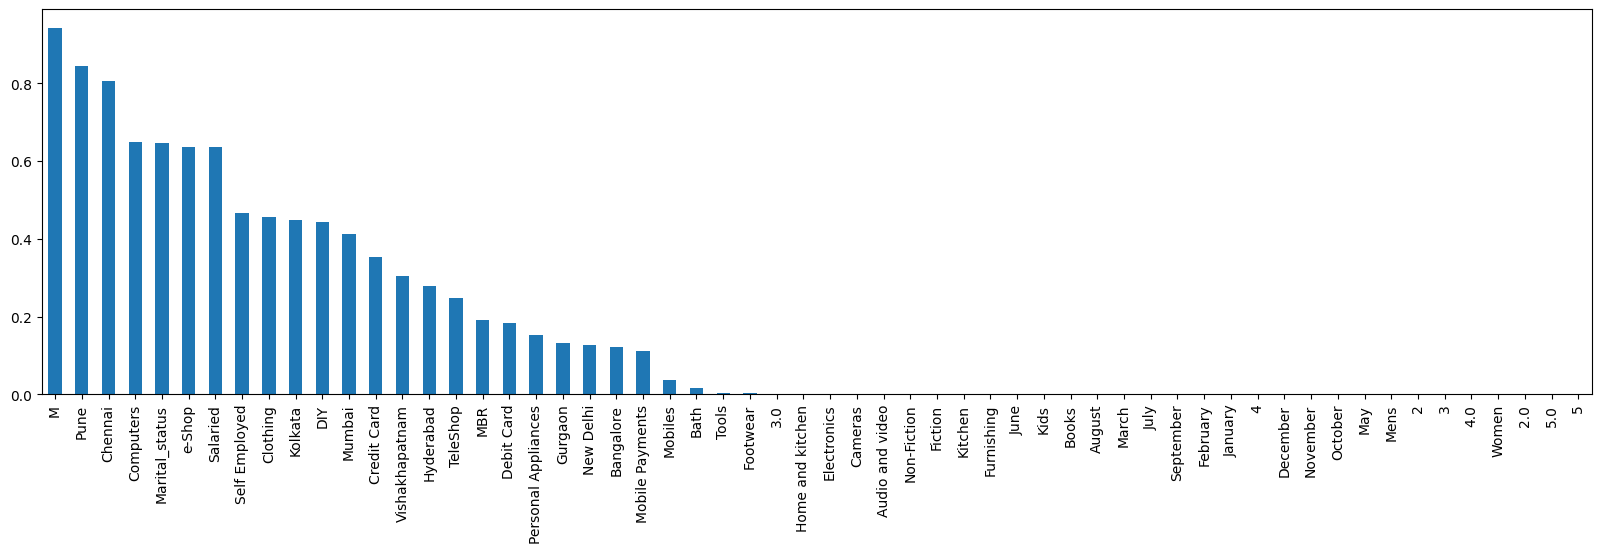

In [43]:
p_values = pd.Series(chi_scores[1],index = chi_catcols.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(20,5))
p_values.plot.bar()

In [44]:
X.drop(['Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Mens', 'Mobiles'],axis=1,inplace=True)

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

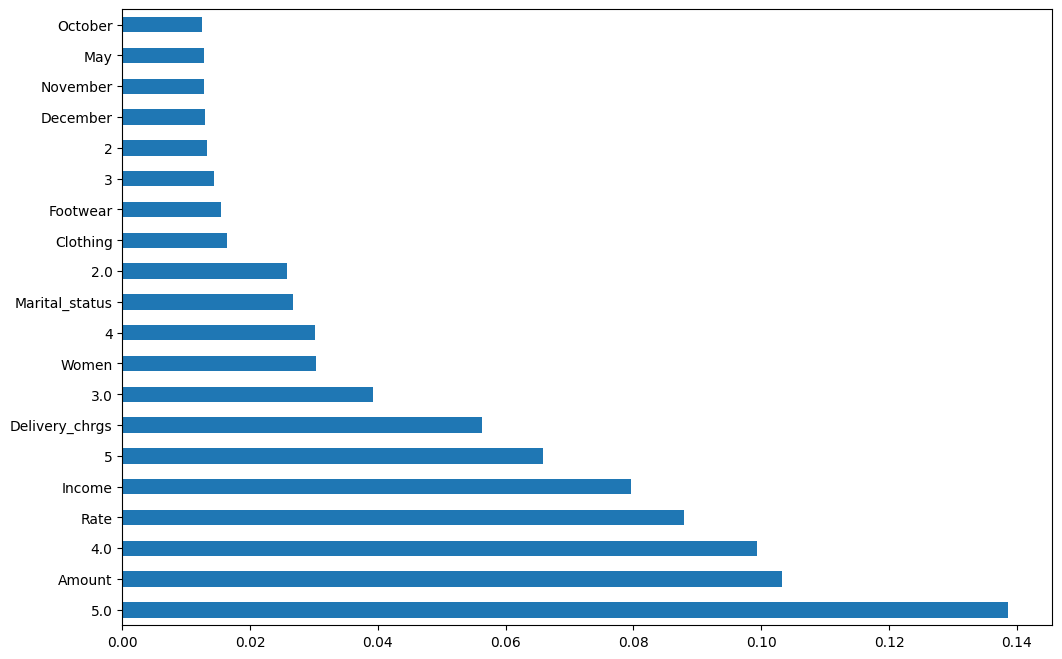

In [46]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
X_train_scaled=scaler.fit_transform(X_train)

In [50]:
X_test_scaled=scaler.transform(X_test)

In [51]:
pip install imbalanced-learn

In [52]:
!pip install -U imbalanced-learn

In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 12221, 1: 1431})
After oversampling:  Counter({0: 12221, 1: 12221})


In [55]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [56]:
y_pred=clf.predict(X_test_scaled)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)


[[4769  467]
 [  74  542]]
The Model accuracy is 0.907552973342447
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      5236
           1       0.54      0.88      0.67       616

    accuracy                           0.91      5852
   macro avg       0.76      0.90      0.81      5852
weighted avg       0.94      0.91      0.92      5852



<ipython-input-58-75adb1dd5983>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


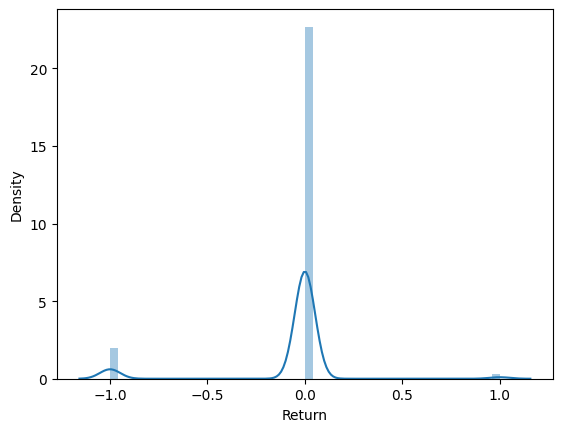

In [58]:
sns.distplot(y_test-y_pred)
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(clf,X,y,cv=5)
print(score)
np.mean(score)

[0.89489874 0.90720328 0.89515509 0.89515509 0.90487179]


0.8994567993742564

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [62]:
gnb = GaussianNB()
gnb.fit(X_train_SMOTE,y_train_SMOTE)

GaussianNB()

In [63]:
y_predicted = gnb.predict(X_test_scaled)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91
